In [4]:
import cv2
print(cv2.__version__)

4.9.0


In [17]:
from wildlife_datasets import analysis, datasets, loader, metrics

In [6]:
datasets.MacaqueFaces.get_data('data/MacaqueFaces')

DATASET MacaqueFaces: DOWNLOADING STARTED.


MacaqueFaces.zip: 12.0MB [06:12, 32.3kB/s]                              
MacaqueFaces_ImageInfo.csv: 410kB [00:07, 55.9kB/s]                            


DATASET MacaqueFaces: EXTRACTING STARTED.
DATASET MacaqueFaces: FINISHED.



In [7]:
d = datasets.MacaqueFaces('data/MacaqueFaces')

In [8]:
d.df

,image_id,identity,path,date,category
0,0,Dan,MacaqueFaces/Contrast/Dan/Macaque_Face_1.jpg,2014-07-03,Contrast
1,1,Dan,MacaqueFaces/Contrast/Dan/Macaque_Face_2.jpg,2014-07-03,Contrast
2,2,Dan,MacaqueFaces/Contrast/Dan/Macaque_Face_3.jpg,2014-08-06,Contrast
3,3,Dan,MacaqueFaces/Contrast/Dan/Macaque_Face_4.jpg,2014-08-06,Contrast
4,4,Dan,MacaqueFaces/Contrast/Dan/Macaque_Face_5.jpg,2014-06-12,Contrast
...,...,...,...,...,...
6275,6275,Verity,MacaqueFaces/Random/Verity/Macaque_Face_6276.jpg,2014-02-19,Random
6276,6276,Verity,MacaqueFaces/Random/Verity/Macaque_Face_6277.jpg,2014-02-19,Random
6277,6277,Verity,MacaqueFaces/Random/Verity/Macaque_Face_6278.jpg,2014-03-21,Random
6278,6278,Verity,MacaqueFaces/Random/Verity/Macaque_Face_6279.jpg,2014-02-19,Random


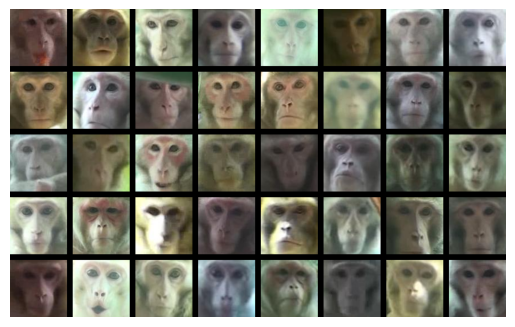

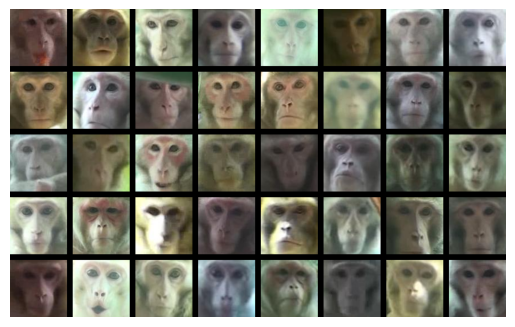

In [9]:
d.plot_grid()

Number of identitites            34
Number of all animals            6280
Number of animals with one image 0
Number of unidentified animals   0
Images span                      1.4 years


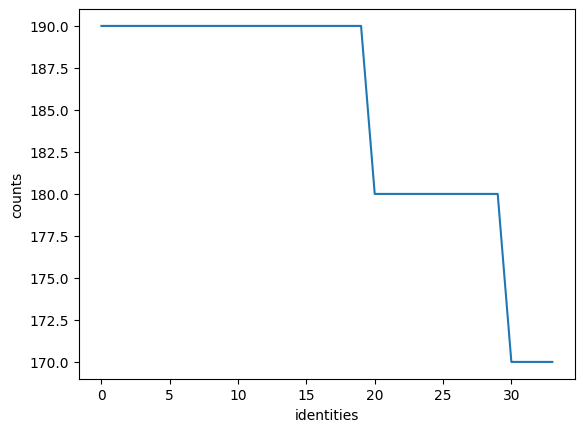

In [10]:
analysis.display_statistics(d.df)

In [11]:
d.metadata

{'licenses': 'The 3-Clause BSD License',
 'licenses_url': 'https://github.com/clwitham/MacaqueFaces/blob/master/license.md',
 'url': 'https://github.com/clwitham/MacaqueFaces',
 'cite': 'witham2018automated',
 'animals': {'rhesus macaque'},
 'real_animals': True,
 'year': 2018,
 'reported_n_total': 6460.0,
 'reported_n_identified': 6460.0,
 'reported_n_photos': 6460.0,
 'reported_n_individuals': 34.0,
 'wild': False,
 'clear_photos': True,
 'pose': 'single',
 'unique_pattern': False,
 'from_video': True,
 'cropped': True,
 'span': '1.4 years',
 'size': 12.0}

In [12]:
d = loader.load_dataset(datasets.MacaqueFaces, 'data', 'dataframes')

In [13]:
from wildlife_datasets import splits

splitter = splits.ClosedSetSplit(0.8)
idx_train, idx_test = splitter.split(d.df)[0]
df_train = d.df.loc[idx_train]

In [14]:
df_test = d.df.loc[idx_test]

In [15]:
y_pred = ['Dan']*len(df_test)

In [18]:
y_true = df_test['identity']
metrics.accuracy(y_true, y_pred)

0.030254777070063694